In [1]:
!pip install pandas
!pip install numpy
!pip install sklearn
!pip install seaborn
!pip install datetime
!pip install matplotlib
!pip install pydot
!pip install graphviz

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from sklearn import tree
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

# Data List

In [3]:
root_dir = "../dataset"

os.chdir(root_dir)
f_lists = os.listdir()

In [4]:
new_file_lists = [f for f in f_lists if f.endswith('.csv')]
print("File Lists : ", new_file_lists)

File Lists :  ['kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.10.25.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.09.16.csv', 'kemp-process-rate.csv', 'kemp-abh-sensor-2021.10.01.csv', 'kemp-ab

In [5]:
data_lists = new_file_lists[:-7]
error_list = new_file_lists[-7]
print("Data Lists : ", data_lists)
print("Error Data List : ", error_list)

Data Lists :  ['kemp-abh-sensor-2021.09.23.csv', 'kemp-abh-sensor-2021.10.26.csv', 'kemp-abh-sensor-2021.09.07.csv', 'kemp-abh-sensor-2021.09.08.csv', 'kemp-abh-sensor-2021.09.09.csv', 'kemp-abh-sensor-2021.09.27.csv', 'kemp-abh-sensor-2021.09.10.csv', 'kemp-abh-sensor-2021.09.17.csv', 'kemp-abh-sensor-2021.09.14.csv', 'kemp-abh-sensor-2021.09.13.csv', 'kemp-abh-sensor-2021.09.15.csv', 'kemp-abh-sensor-2021.10.21.csv', 'kemp-abh-sensor-2021.09.28.csv', 'kemp-abh-sensor-2021.10.25.csv', 'kemp-abh-sensor-2021.10.07.csv', 'kemp-abh-sensor-2021.09.24.csv', 'kemp-abh-sensor-2021.10.13.csv', 'kemp-abh-sensor-2021.10.14.csv', 'kemp-abh-sensor-2021.09.30.csv', 'kemp-abh-sensor-2021.10.20.csv', 'kemp-abh-sensor-2021.09.29.csv', 'kemp-abh-sensor-2021.10.15.csv', 'kemp-abh-sensor-2021.10.18.csv', 'kemp-abh-sensor-2021.10.05.csv', 'kemp-abh-sensor-2021.10.27.csv', 'kemp-abh-sensor-2021.10.06.csv', 'kemp-abh-sensor-2021.09.16.csv']
Error Data List :  kemp-process-rate.csv


In [6]:
data_lists

['kemp-abh-sensor-2021.09.23.csv',
 'kemp-abh-sensor-2021.10.26.csv',
 'kemp-abh-sensor-2021.09.07.csv',
 'kemp-abh-sensor-2021.09.08.csv',
 'kemp-abh-sensor-2021.09.09.csv',
 'kemp-abh-sensor-2021.09.27.csv',
 'kemp-abh-sensor-2021.09.10.csv',
 'kemp-abh-sensor-2021.09.17.csv',
 'kemp-abh-sensor-2021.09.14.csv',
 'kemp-abh-sensor-2021.09.13.csv',
 'kemp-abh-sensor-2021.09.15.csv',
 'kemp-abh-sensor-2021.10.21.csv',
 'kemp-abh-sensor-2021.09.28.csv',
 'kemp-abh-sensor-2021.10.25.csv',
 'kemp-abh-sensor-2021.10.07.csv',
 'kemp-abh-sensor-2021.09.24.csv',
 'kemp-abh-sensor-2021.10.13.csv',
 'kemp-abh-sensor-2021.10.14.csv',
 'kemp-abh-sensor-2021.09.30.csv',
 'kemp-abh-sensor-2021.10.20.csv',
 'kemp-abh-sensor-2021.09.29.csv',
 'kemp-abh-sensor-2021.10.15.csv',
 'kemp-abh-sensor-2021.10.18.csv',
 'kemp-abh-sensor-2021.10.05.csv',
 'kemp-abh-sensor-2021.10.27.csv',
 'kemp-abh-sensor-2021.10.06.csv',
 'kemp-abh-sensor-2021.09.16.csv']

In [7]:
pd.read_csv(data_lists[1])

,Index,LoT,Time,pH,Temp
0,1,1,오전 9:01:42,1.06,47.92
1,2,1,오전 9:01:47,1.07,48.12
2,3,1,오전 9:01:52,1.08,48.15
3,4,1,오전 9:01:57,1.12,48.15
4,5,1,오전 9:02:02,1.13,48.33
...,...,...,...,...,...
1513,1514,22,오전 11:14:52,2.85,52.02
1514,1515,22,오전 11:14:57,2.88,52.09
1515,1516,22,오전 11:15:02,2.98,52.14
1516,1517,22,오전 11:15:07,2.99,52.43


# Make Function

In [8]:
def csv_read_(data_dir, data_list):
    tmp = pd.read_csv(os.path.join(data_dir, data_list), sep=',', encoding='utf-8')
    y, m, d = map(int, data_list.split('-')[-1].split('.')[:-1])
    time = tmp['Time']
    tmp['DTime'] = '-'.join(data_list.split('-')[-1].split('.')[:-1])
    ctime = time.apply(lambda _ : _.replace(u'오후', 'PM').replace(u'오전', 'AM'))
    n_time = ctime.apply(lambda _ : datetime.datetime.strptime(_, "%p %I:%M:%S"))
    newtime = n_time.apply(lambda _ : _.replace(year=y, month=m, day=d))
    tmp['Time'] = newtime
    return tmp

# Make Dedicated DataFrame

In [9]:
dd = csv_read_(root_dir, data_lists[0])
for i in range(1, len(data_lists)):
    dd = pd.merge(dd, csv_read_(root_dir, data_lists[i]), how='outer')
dd

,Index,LoT,Time,pH,Temp,DTime
0,1,1,2021-09-23 09:01:18,1.07,47.20,2021-09-23
1,2,1,2021-09-23 09:01:23,1.10,47.57,2021-09-23
2,3,1,2021-09-23 09:01:28,1.12,48.15,2021-09-23
3,4,1,2021-09-23 09:01:33,1.14,48.16,2021-09-23
4,5,1,2021-09-23 09:01:38,1.19,48.18,2021-09-23
...,...,...,...,...,...,...
40981,1514,22,2021-09-16 11:14:41,2.83,51.23,2021-09-16
40982,1515,22,2021-09-16 11:14:46,2.94,51.40,2021-09-16
40983,1516,22,2021-09-16 11:14:51,2.94,51.84,2021-09-16
40984,1517,22,2021-09-16 11:14:56,2.98,51.87,2021-09-16


In [10]:
dd.describe()

,Index,LoT,Time,pH,Temp
count,40986.000000,40986.000000,40986,40986.000000,40986.000000
mean,759.500000,11.500000,2021-10-01 01:14:51.034914304,2.006031,49.874121
min,1.000000,1.000000,2021-09-07 09:01:42,1.010000,38.020000
25%,380.000000,6.000000,2021-09-15 10:41:52.249999872,1.560000,49.280000
50%,759.500000,11.500000,2021-09-29 10:08:20.500000,2.000000,49.960000
75%,1139.000000,17.000000,2021-10-15 09:34:52.750000128,2.430000,50.640000
max,1518.000000,22.000000,2021-10-27 11:15:01,3.990000,54.190000
std,438.214105,6.344366,NaN,0.550845,1.356120


In [11]:
dd = dd.drop('Index', axis=1)
dd

,LoT,Time,pH,Temp,DTime
0,1,2021-09-23 09:01:18,1.07,47.20,2021-09-23
1,1,2021-09-23 09:01:23,1.10,47.57,2021-09-23
2,1,2021-09-23 09:01:28,1.12,48.15,2021-09-23
3,1,2021-09-23 09:01:33,1.14,48.16,2021-09-23
4,1,2021-09-23 09:01:38,1.19,48.18,2021-09-23
...,...,...,...,...,...
40981,22,2021-09-16 11:14:41,2.83,51.23,2021-09-16
40982,22,2021-09-16 11:14:46,2.94,51.40,2021-09-16
40983,22,2021-09-16 11:14:51,2.94,51.84,2021-09-16
40984,22,2021-09-16 11:14:56,2.98,51.87,2021-09-16


In [12]:
dd = dd.set_index('Time')
dd

,LoT,pH,Temp,DTime
Time,,,,
2021-09-23 09:01:18,1,1.07,47.20,2021-09-23
2021-09-23 09:01:23,1,1.10,47.57,2021-09-23
2021-09-23 09:01:28,1,1.12,48.15,2021-09-23
2021-09-23 09:01:33,1,1.14,48.16,2021-09-23
2021-09-23 09:01:38,1,1.19,48.18,2021-09-23
...,...,...,...,...
2021-09-16 11:14:41,22,2.83,51.23,2021-09-16
2021-09-16 11:14:46,22,2.94,51.40,2021-09-16
2021-09-16 11:14:51,22,2.94,51.84,2021-09-16


In [13]:
dedicated_data = dd.copy()
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-23 09:01:18,1,1.07,47.20,2021-09-23
2021-09-23 09:01:23,1,1.10,47.57,2021-09-23
2021-09-23 09:01:28,1,1.12,48.15,2021-09-23
2021-09-23 09:01:33,1,1.14,48.16,2021-09-23
2021-09-23 09:01:38,1,1.19,48.18,2021-09-23
...,...,...,...,...
2021-09-16 11:14:41,22,2.83,51.23,2021-09-16
2021-09-16 11:14:46,22,2.94,51.40,2021-09-16
2021-09-16 11:14:51,22,2.94,51.84,2021-09-16


In [14]:
dedicated_data.describe()

,LoT,pH,Temp
count,40986.000000,40986.000000,40986.000000
mean,11.500000,2.006031,49.874121
std,6.344366,0.550845,1.356120
min,1.000000,1.010000,38.020000
25%,6.000000,1.560000,49.280000
50%,11.500000,2.000000,49.960000
75%,17.000000,2.430000,50.640000
max,22.000000,3.990000,54.190000


In [15]:
dedicated_data.columns

Index(['LoT', 'pH', 'Temp', 'DTime'], dtype='object')

In [16]:
dedicated_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 40986 entries, 2021-09-23 09:01:18 to 2021-09-16 11:15:01
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LoT     40986 non-null  int64  
 1   pH      40986 non-null  float64
 2   Temp    40986 non-null  float64
 3   DTime   40986 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 1.6+ MB


In [17]:
dedicated_data.shape

(40986, 4)

In [18]:
dedicated_data.isna().sum()

LoT      0
pH       0
Temp     0
DTime    0
dtype: int64

array([[<Axes: title={'center': 'LoT'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>, <Axes: >]], dtype=object)

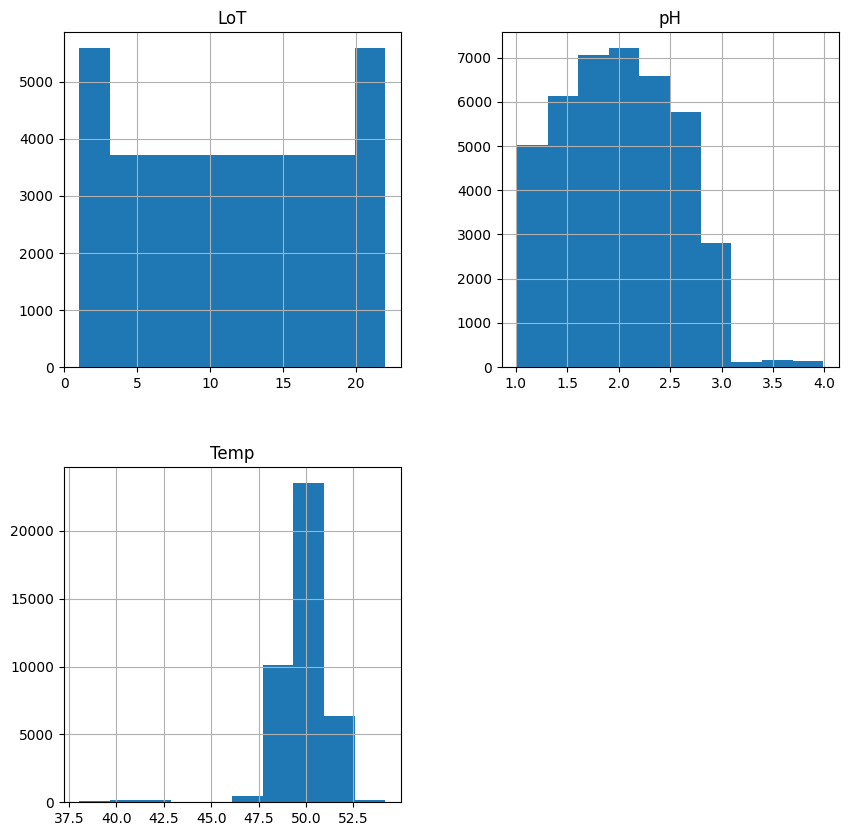

In [19]:
dedicated_data.hist(figsize=(10,10))

In [21]:
columns_to_log = ['LoT', 'pH', 'Temp']
dedicated_data_log = dedicated_data.copy()  # 데이터 복사

for column in columns_to_log:
    dedicated_data_log[column] = np.log(dedicated_data_log[column] + 1)

array([[<Axes: title={'center': 'LoT'}>, <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'Temp'}>, <Axes: >]], dtype=object)

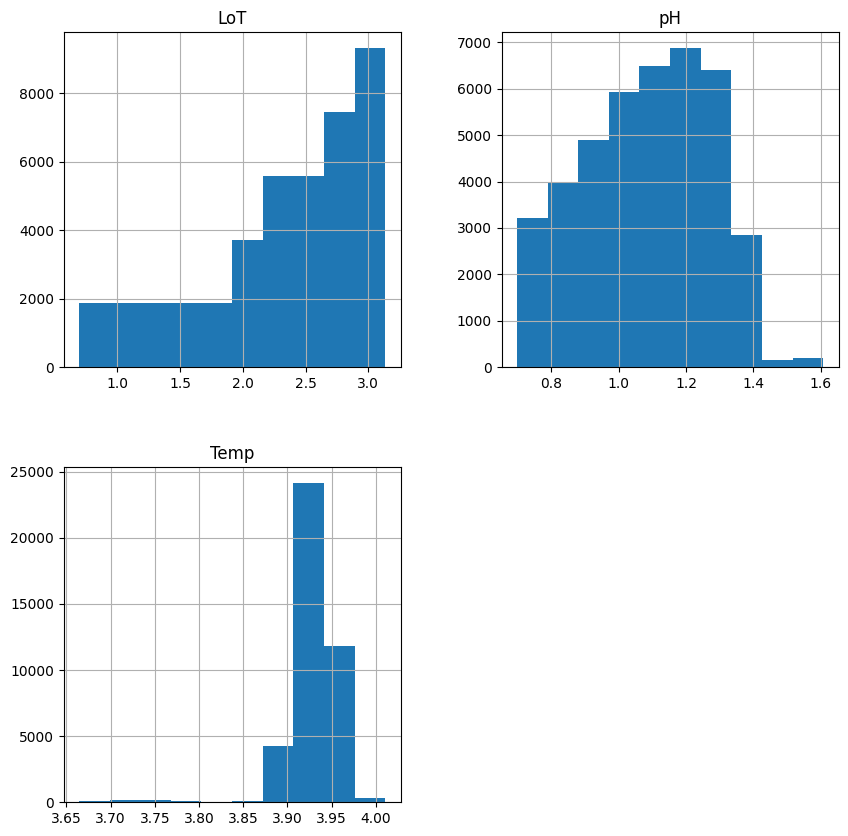

In [22]:
dedicated_data_log.hist(figsize=(10,10))

In [21]:
selected_columns = ["LoT", "Temp", "pH"]
correlation = dedicated_data[selected_columns].corr()
correlation

,LoT,Temp,pH
LoT,1.000000,0.011180,-0.003362
Temp,0.011180,1.000000,0.468727
pH,-0.003362,0.468727,1.000000


<Axes: >

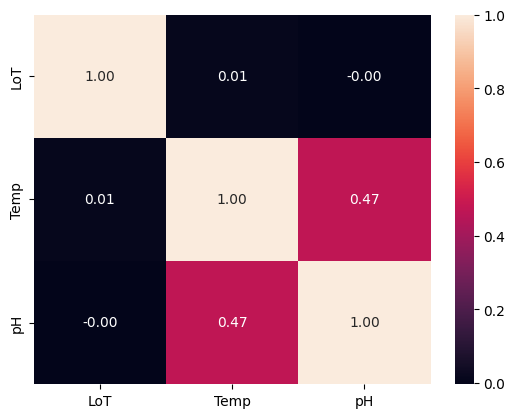

In [22]:
sns.heatmap(correlation, annot=True, fmt='.2f')
# 온도랑 ph 랑 상관관계

In [23]:
dedicated_data = dedicated_data.dropna() # 결측치 제거
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-23 09:01:18,1,1.07,47.20,2021-09-23
2021-09-23 09:01:23,1,1.10,47.57,2021-09-23
2021-09-23 09:01:28,1,1.12,48.15,2021-09-23
2021-09-23 09:01:33,1,1.14,48.16,2021-09-23
2021-09-23 09:01:38,1,1.19,48.18,2021-09-23
...,...,...,...,...
2021-09-16 11:14:41,22,2.83,51.23,2021-09-16
2021-09-16 11:14:46,22,2.94,51.40,2021-09-16
2021-09-16 11:14:51,22,2.94,51.84,2021-09-16


In [24]:
lot_lists = dedicated_data['LoT'].unique() # 고윳값 변환
print(lot_lists)
print(len(lot_lists))

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
22


In [25]:
d_lists = dedicated_data['DTime'].unique()
print(d_lists)
print(len(d_lists))

['2021-09-23' '2021-10-26' '2021-09-07' '2021-09-08' '2021-09-09'
 '2021-09-27' '2021-09-10' '2021-09-17' '2021-09-14' '2021-09-13'
 '2021-09-15' '2021-10-21' '2021-09-28' '2021-10-25' '2021-10-07'
 '2021-09-24' '2021-10-13' '2021-10-14' '2021-09-30' '2021-10-20'
 '2021-09-29' '2021-10-15' '2021-10-18' '2021-10-05' '2021-10-27'
 '2021-10-06' '2021-09-16']
27


# Read Process Data

In [26]:
process = pd.read_csv(os.path.join(root_dir, error_list), sep=',', encoding='utf-8')
process

,Date,LoT,Process Rate
0,2021-09-06,1,96.38
1,2021-09-06,2,97.40
2,2021-09-06,3,95.40
3,2021-09-06,4,96.35
4,2021-09-06,5,94.77
...,...,...,...
721,2021-10-27,18,97.29
722,2021-10-27,19,97.21
723,2021-10-27,20,98.38
724,2021-10-27,21,98.36


In [27]:
lot_process_lists = process['LoT'].unique()
d_process_lists = process['Date'].unique()
print("Unique LoT List : ", lot_process_lists)
print("Unique Date List : ", d_process_lists)

Unique LoT List :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Unique Date List :  ['2021-09-06' '2021-09-07' '2021-09-08' '2021-09-09' '2021-09-10'
 '2021-09-13' '2021-09-14' '2021-09-15' '2021-09-16' '2021-09-17'
 '2021-09-23' '2021-09-24' '2021-09-27' '2021-09-28' '2021-09-29'
 '2021-09-30' '2021-10-01' '2021-10-05' '2021-10-06' '2021-10-07'
 '2021-10-08' '2021-10-12' '2021-10-13' '2021-10-14' '2021-10-15'
 '2021-10-18' '2021-10-19' '2021-10-20' '2021-10-21' '2021-10-22'
 '2021-10-25' '2021-10-26' '2021-10-27']


# Make Training Data Set

In [28]:
X_data = pd.DataFrame(columns=['LoT', 'pH', 'Temp', 'Process'])

In [29]:
d_lists

array(['2021-09-23', '2021-10-26', '2021-09-07', '2021-09-08',
       '2021-09-09', '2021-09-27', '2021-09-10', '2021-09-17',
       '2021-09-14', '2021-09-13', '2021-09-15', '2021-10-21',
       '2021-09-28', '2021-10-25', '2021-10-07', '2021-09-24',
       '2021-10-13', '2021-10-14', '2021-09-30', '2021-10-20',
       '2021-09-29', '2021-10-15', '2021-10-18', '2021-10-05',
       '2021-10-27', '2021-10-06', '2021-09-16'], dtype=object)

In [30]:
lot_lists

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22])

In [31]:
dedicated_data['DTime']

Time
2021-09-23 09:01:18    2021-09-23
2021-09-23 09:01:23    2021-09-23
2021-09-23 09:01:28    2021-09-23
2021-09-23 09:01:33    2021-09-23
2021-09-23 09:01:38    2021-09-23
                          ...    
2021-09-16 11:14:41    2021-09-16
2021-09-16 11:14:46    2021-09-16
2021-09-16 11:14:51    2021-09-16
2021-09-16 11:14:56    2021-09-16
2021-09-16 11:15:01    2021-09-16
Name: DTime, Length: 40986, dtype: object

In [32]:
for d in d_lists:
    for lot in lot_lists:
        tmp = dedicated_data[(dedicated_data['DTime'] == d) & (dedicated_data['LoT'] == lot)]
        tmp = tmp[['pH', 'Temp', 'LoT']]
        process_val = process[(process['Date'] == d) & (process['LoT'] == lot)]['Process Rate'].values
        trr = np.full(tmp.shape[0], process_val)
        tmp['Process'] = trr
        X_data = pd.concat([X_data, tmp])

X_data = X_data.apply(pd.to_numeric)
X_data = X_data[['LoT', 'pH', 'Temp', 'Process']]

In [28]:
X_data = pd.read_csv("../source/data.csv")
X_data

,LoT,pH,Temp,Process
0,1,1.07,47.20,96.54
1,1,1.10,47.57,96.54
2,1,1.12,48.15,96.54
3,1,1.14,48.16,96.54
4,1,1.19,48.18,96.54
...,...,...,...,...
40981,22,2.83,51.23,95.88
40982,22,2.94,51.40,95.88
40983,22,2.94,51.84,95.88
40984,22,2.98,51.87,95.88


In [33]:
columns_to_log = X_data.columns.difference(['Process'])


X_data[columns_to_log] = X_data[columns_to_log].apply(lambda x: np.log(x + 1))
X_data # 로그변환

,LoT,pH,Temp,Process
0,0.526589,0.546703,1.584194,96.54
1,0.526589,0.554998,1.585761,96.54
2,0.526589,0.560425,1.588189,96.54
3,0.526589,0.565772,1.588231,96.54
4,0.526589,0.578803,1.588314,96.54
...,...,...,...,...
40981,1.419607,0.851374,1.600530,95.88
40982,1.419607,0.863388,1.601185,95.88
40983,1.419607,0.863388,1.602870,95.88
40984,1.419607,0.867639,1.602984,95.88


In [35]:
X_data.describe()

,LoT,pH,Temp,Process
count,40986.000000,40986.000000,40986.000000,40986.000000
mean,1.183810,0.729977,1.595115,95.993805
std,0.229838,0.090767,0.005739,3.252491
min,0.526589,0.529530,1.539889,80.780000
25%,1.080418,0.662692,1.592822,96.160000
50%,1.259796,0.741276,1.595550,96.610000
75%,1.358505,0.803149,1.598235,97.200000
max,1.419607,0.958367,1.611592,98.450000


In [36]:
train_data, test_data = train_test_split(X_data, test_size=0.2)

In [37]:
train_data.describe()

,LoT,pH,Temp,Process
count,32788.000000,32788.000000,32788.000000,32788.000000
mean,1.183254,0.729817,1.595091,95.984037
std,0.230514,0.091004,0.005804,3.272762
min,0.526589,0.529530,1.539889,80.780000
25%,1.080418,0.662692,1.592782,96.160000
50%,1.248441,0.741276,1.595550,96.610000
75%,1.358505,0.803149,1.598235,97.200000
max,1.419607,0.958367,1.611592,98.450000


In [38]:
train_data.corr()

,LoT,pH,Temp,Process
LoT,1.000000,-0.002085,0.061908,0.482067
pH,-0.002085,1.000000,0.465846,-0.003709
Temp,0.061908,0.465846,1.000000,0.146384
Process,0.482067,-0.003709,0.146384,1.000000


In [39]:
test_data.describe()

,LoT,pH,Temp,Process
count,8198.000000,8198.000000,8198.000000,8198.000000
mean,1.186032,0.730619,1.595211,96.032869
std,0.227111,0.089818,0.005472,3.170020
min,0.526589,0.529530,1.542074,80.780000
25%,1.080418,0.666695,1.592903,96.160000
50%,1.271150,0.741276,1.595590,96.600000
75%,1.358505,0.804452,1.598235,97.200000
max,1.419607,0.957598,1.611157,98.450000


In [40]:
test_data.corr()

,LoT,pH,Temp,Process
LoT,1.000000,-0.010494,0.053715,0.465905
pH,-0.010494,1.000000,0.527412,-0.014225
Temp,0.053715,0.527412,1.000000,0.140319
Process,0.465905,-0.014225,0.140319,1.000000


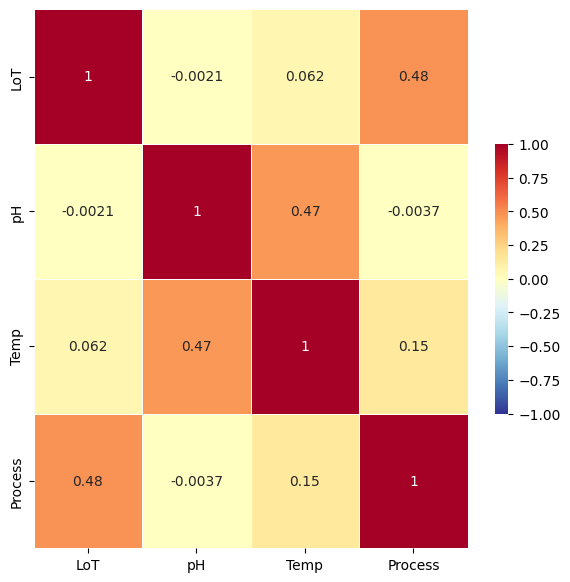

In [41]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(train_data.corr(),
           cmap='RdYlBu_r',
           annot = True,
           linewidths=0.5,
           cbar_kws={"shrink":.5},
           vmin=-1, vmax=1)
plt.show()

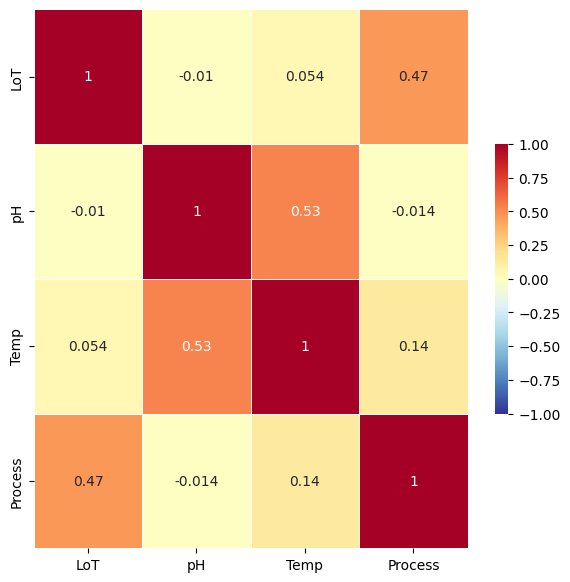

In [42]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(test_data.corr(),
           cmap='RdYlBu_r',
           annot = True,
           linewidths=0.5,
           cbar_kws={"shrink":.5},
           vmin=-1, vmax=1)
plt.show()

# Decision Tree Regressor Model

In [43]:
clf = tree.DecisionTreeRegressor()

In [44]:
clf = clf.fit(train_data[['pH','Temp']], train_data[['Process']])

vis : Model 시각화 진행 유무에 대한 trigger 역할

* 모델을 시각화하여 보고 싶으면 vis = True로 진행
* 모델을 시각화하고 싶지 않으면 vis = False로 진행

기본적인 Decision Tree Regressor Model의 경우 Tree Depth가 정해져있지 않기 때문에 깊은 모델이 만들어지며, 이에 따라 시각화하는데 시간이 오래 걸릴 수 있음.

In [45]:
vis = False

In [46]:
if vis:
    plt.figure(figsize=(10, 30))
    tree.plot_tree(clf)
    plt.show()

# Decision Tree Regressor Model Tuning

In [47]:
new_clf = tree.DecisionTreeRegressor(max_depth=3)

In [48]:
new_clf = new_clf.fit(train_data[['pH','Temp']], train_data[['Process']])

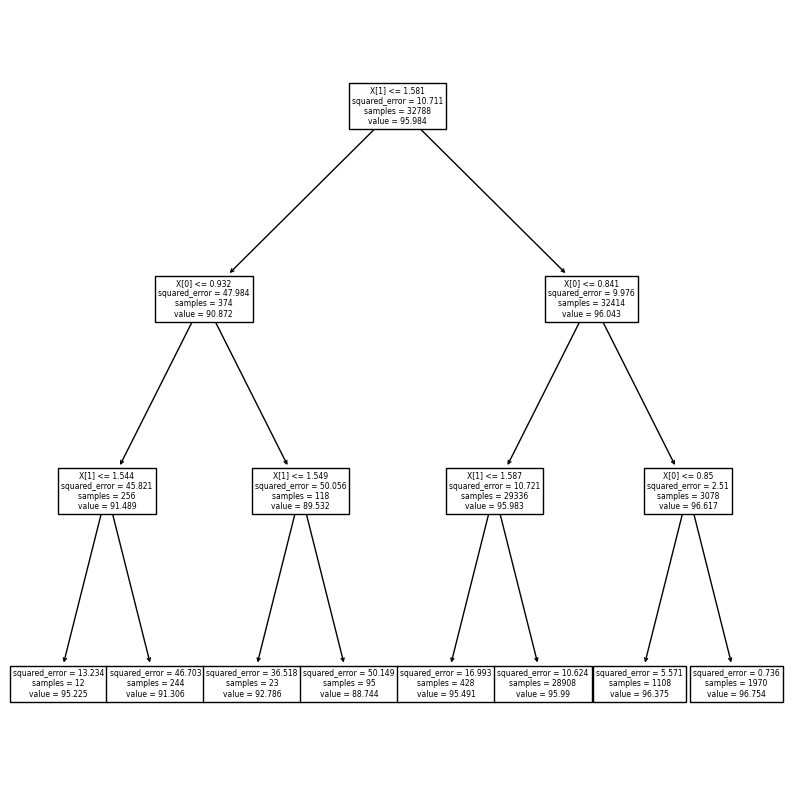

In [49]:
plt.figure(figsize=(10, 10))
tree.plot_tree(new_clf)
plt.show()

# Test two Models

In [52]:
predicted_data = clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [87.28666667 96.92       96.88       ... 97.55       96.74
 96.08      ]
Decision Tree Model RMSE :  4.026264056396296


In [53]:
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

accuracy  =  0.33739936569895096


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.07      0.03      0.04       105
        83.0       0.05      0.02      0.03       167
        84.0       0.06      0.03      0.04       103
        87.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        19
        96.0       0.41      0.30      0.35      3246
        97.0       0.41      0.51      0.45      3288
        98.0       0.16      0.09      0.12      1228

    accuracy                           0.34      8198
   macro avg       0.07   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


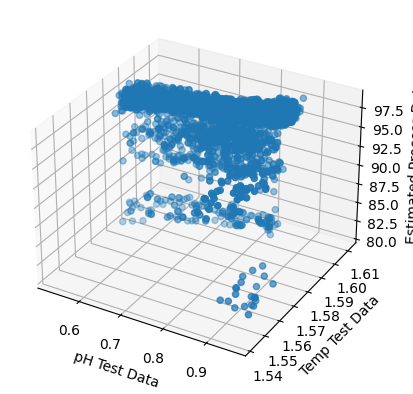

In [55]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()


In [56]:
predicted_data = new_clf.predict(test_data[['pH', 'Temp']])
print('Decision Tree Model Predict : ', predicted_data)
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('Decision Tree Model RMSE : ',rmse)

Decision Tree Model Predict :  [95.99006157 95.99006157 95.99006157 ... 95.99006157 96.75361421
 95.99006157]
Decision Tree Model RMSE :  3.1207134350904373


In [57]:
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

accuracy  =  0.38680165894120516


In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        89.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        19
        96.0       0.40      0.92      0.55      3246
        97.0       0.40      0.06      0.10      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.39      8198
   macro avg       0.07      0.09      0.06      8198
weighted avg       0.32      0.39      0.26      8198



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

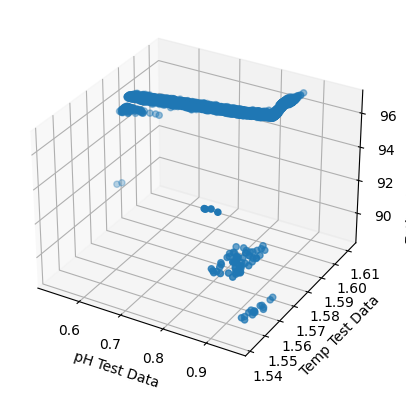

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()

In [60]:
perc =30
data_columns = ['pH', 'Temp']
for df_name in list(data_columns):
    print(f'DataFrame name: {df_name}')
    df = dedicated_data[df_name]
    print('[step 1-1]')
    print(round(df.isnull().sum()/len(df)*100,2))
    print('[step 1-2]')
    print(df.isnull().sum()/len(df)*100>perc)
    print('[step 2-1]')
    print(df.isnull().head())
    print('[step 2-2]')
    print(df.isnull().sum())
    print('[step 2-3]')
    cmpt_len =df.isnull().sum().sum()
    print(cmpt_len)
    print("결측치 = %d개 \n완전성 지수 : %.2f%% "%(cmpt_len,(1-cmpt_len/len(df))*100))
    print('\n\n')

DataFrame name: pH
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: pH, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 



DataFrame name: Temp
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: Temp, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 





In [61]:
check_unique = dedicated_data[['pH', 'Temp']].value_counts().reset_index()
unique_count = len(check_unique)
non_unique_count = len(check_unique[check_unique['count'] > 1])
perc_check_unique_item_urgent_info = round((unique_count - non_unique_count) / unique_count * 100, 2)

print(f'The percentage of uniqueness for pH<->Temp : {perc_check_unique_item_urgent_info}')
print("유일성 지수 : %.2f%% " % (perc_check_unique_item_urgent_info))


The percentage of uniqueness for pH<->Temp : 41.77
유일성 지수 : 41.77% 


In [62]:
dedicated_data

,LoT,pH,Temp,DTime
Time,,,,
2021-09-23 09:01:18,1,1.07,47.20,2021-09-23
2021-09-23 09:01:23,1,1.10,47.57,2021-09-23
2021-09-23 09:01:28,1,1.12,48.15,2021-09-23
2021-09-23 09:01:33,1,1.14,48.16,2021-09-23
2021-09-23 09:01:38,1,1.19,48.18,2021-09-23
...,...,...,...,...
2021-09-16 11:14:41,22,2.83,51.23,2021-09-16
2021-09-16 11:14:46,22,2.94,51.40,2021-09-16
2021-09-16 11:14:51,22,2.94,51.84,2021-09-16


In [63]:
df = dedicated_data
pH_lb = df['pH'] >= 1
pH_ub = df['pH'] <= 4
temp_lb = df['Temp'] >= 35
temp_ub = df['Temp'] <= 65
vald_df = df[pH_lb & pH_ub & temp_lb & temp_ub]
print(f'[Step 1] 데이터 범위를 벗어난 데이터 수: {len(df) - len(vald_df)}')

d0 = '2021-09-06'
d1 = '2021-10-27'
vald_df = vald_df.loc[(vald_df['DTime'] >= d0) & (vald_df['DTime'] <= d1)]
print(f'[Step 2] 수집된 날짜를 벗어나는 데이터 수: {len(df) - len(vald_df)}')

vald_df['DTime'] = vald_df['DTime'].apply(lambda x: isinstance(x, datetime.datetime))
vald_df['pH'] = vald_df['pH'].apply(lambda x: isinstance(x, float))
vald_df['Temp'] = vald_df['Temp'].apply(lambda x: isinstance(x, float))
print(f'[Step 3] 데이터 형식을 벗어나는 데이터 수: {len(df) - len(vald_df)}')

vald_df = vald_df[(vald_df['pH'] == True) & (vald_df['Temp'] == True)]
vald_len = len(vald_df)
item_vald = vald_len / len(df) * 100
print("유효성 지수 : %.2f%% " % (item_vald))


[Step 1] 데이터 범위를 벗어난 데이터 수: 0
[Step 2] 수집된 날짜를 벗어나는 데이터 수: 0
[Step 3] 데이터 형식을 벗어나는 데이터 수: 0
유효성 지수 : 100.00% 


# SVR

In [64]:
from sklearn.svm import SVR

svm_clf = SVR(kernel='linear')

svm_clf.fit(train_data[['pH', 'Temp']], train_data['Process'])

SVR(kernel='linear')

In [65]:
predicted_data = svm_clf.predict(test_data[['pH', 'Temp']])
print('SVM Model Predict : ', predicted_data)

SVM Model Predict :  [96.59130613 96.58784225 96.59080683 ... 96.58180292 96.60812308
 96.58489302]


In [66]:
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('SVM Model RMSE : ', rmse)

SVM Model RMSE :  3.213677877105237


In [67]:
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

accuracy  =  0.40143937545742864


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        95.0       0.00      0.00      0.00        19
        96.0       0.27      0.01      0.01      3246
        97.0       0.40      0.99      0.57      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.40      8198
   macro avg       0.08      0.13      0.07      8198
weighted avg       0.27      0.40      0.23      8198



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


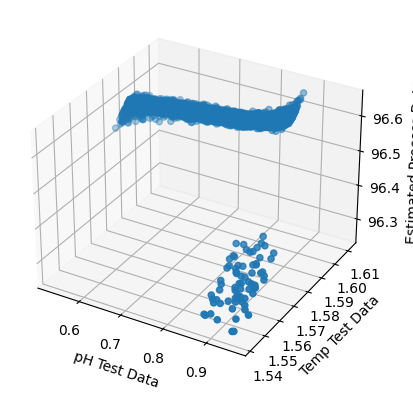

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()

In [70]:
perc = 30
data_columns = ['pH', 'Temp']
for df_name in list(data_columns):
    print(f'DataFrame name: {df_name}')
    df = dedicated_data[df_name]
    print('[step 1-1]')
    print(round(df.isnull().sum()/len(df)*100,2))
    print('[step 1-2]')
    print(df.isnull().sum()/len(df)*100 > perc)
    print('[step 2-1]')
    print(df.isnull().head())
    print('[step 2-2]')
    print(df.isnull().sum())
    print('[step 2-3]')
    cmpt_len = df.isnull().sum().sum()
    print(cmpt_len)
    print("결측치 = %d개 \n완전성 지수 : %.2f%% " % (cmpt_len, (1-cmpt_len/len(df))*100))
    print('\n\n')

DataFrame name: pH
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: pH, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 



DataFrame name: Temp
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: Temp, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 





In [71]:
check_unique = dedicated_data[['pH', 'Temp']].value_counts().reset_index()
unique_count = len(check_unique)
non_unique_count = len(check_unique[check_unique['count'] > 1])
perc_check_unique_item_urgent_info = round((unique_count - non_unique_count) / unique_count * 100, 2)

print(f'The percentage of uniqueness for pH<->Temp : {perc_check_unique_item_urgent_info}')
print("유일성 지수 : %.2f%% " % (perc_check_unique_item_urgent_info))

The percentage of uniqueness for pH<->Temp : 41.77
유일성 지수 : 41.77% 


# XGboost

XGBoost Model Predict :  [95.08466  95.54819  96.55179  ... 96.43567  96.80815  96.506195]
XGBoost Model RMSE :  3.180545694187058
accuracy  =  0.3387411563796048
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.11      0.00        19
        96.0       0.40      0.61      0.48      3246
        97.0       0.41      0.25      0.31      3288
        98.0       0.20   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

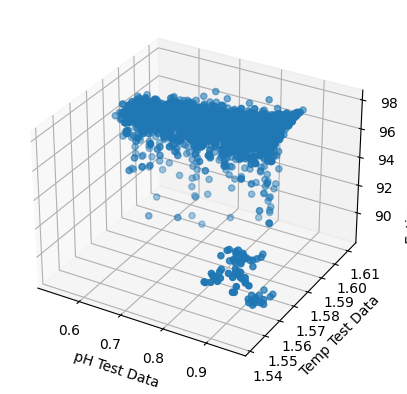

DataFrame name: pH
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: pH, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 



DataFrame name: Temp
[step 1-1]
0.0
[step 1-2]
False
[step 2-1]
Time
2021-09-23 09:01:18    False
2021-09-23 09:01:23    False
2021-09-23 09:01:28    False
2021-09-23 09:01:33    False
2021-09-23 09:01:38    False
Name: Temp, dtype: bool
[step 2-2]
0
[step 2-3]
0
결측치 = 0개 
완전성 지수 : 100.00% 



The percentage of uniqueness for pH<->Temp : 41.77
유일성 지수 : 41.77% 


In [72]:
import xgboost as xgb

xgb_reg = xgb.XGBRegressor()

xgb_reg.fit(train_data[['pH', 'Temp']], train_data['Process'])

# 예측
predicted_data = xgb_reg.predict(test_data[['pH', 'Temp']])
print('XGBoost Model Predict : ', predicted_data)

# RMSE 계산
rmse = sqrt(mean_squared_error(test_data['Process'], predicted_data))
print('XGBoost Model RMSE : ', rmse)

# 정확도 계산
y_test = test_data['Process']
y_test = [round(y, 0) for y in y_test]
y_pred = [round(y, 0) for y in predicted_data]
print("accuracy  = ", accuracy_score(y_test, y_pred))

# 분류 보고서 출력
print(classification_report(y_test, y_pred))

# 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_data['pH'], test_data['Temp'], predicted_data)
ax.set_xlabel('pH Test Data')
ax.set_ylabel('Temp Test Data')
ax.set_zlabel('Estimated Process Data')
plt.show()

# 데이터 완전성 평가
perc = 30
data_columns = ['pH', 'Temp']
for df_name in list(data_columns):
    print(f'DataFrame name: {df_name}')
    df = dedicated_data[df_name]
    print('[step 1-1]')
    print(round(df.isnull().sum()/len(df)*100,2))
    print('[step 1-2]')
    print(df.isnull().sum()/len(df)*100 > perc)
    print('[step 2-1]')
    print(df.isnull().head())
    print('[step 2-2]')
    print(df.isnull().sum())
    print('[step 2-3]')
    cmpt_len = df.isnull().sum().sum()
    print(cmpt_len)
    print("결측치 = %d개 \n완전성 지수 : %.2f%% " % (cmpt_len, (1-cmpt_len/len(df))*100))
    print('\n\n')

# 데이터 유일성 평가
check_unique = dedicated_data[['pH', 'Temp']].value_counts().reset_index()
unique_count = len(check_unique)
non_unique_count = len(check_unique[check_unique['count'] > 1])
perc_check_unique_item_urgent_info = round((unique_count - non_unique_count) / unique_count * 100, 2)

print(f'The percentage of uniqueness for pH<->Temp : {perc_check_unique_item_urgent_info}')
print("유일성 지수 : %.2f%% " % (perc_check_unique_item_urgent_info))


In [73]:
!pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: distro-info 1.1build1 has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of distro-info or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


# 회귀모델들 비교

In [74]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report
from math import sqrt
import matplotlib.pyplot as plt

In [75]:
def fit_model(model, train_data, features, target):
    model.fit(train_data[features], train_data[target])

In [76]:
def predict(model, test_data, features):
    return model.predict(test_data[features])

In [77]:
def calculate_rmse(true_values, predicted_values):
    return sqrt(mean_squared_error(true_values, predicted_values))

In [78]:
def calculate_accuracy(true_values, predicted_values):
    true_values = [round(y, 0) for y in true_values]
    predicted_values = [round(y, 0) for y in predicted_values]
    return accuracy_score(true_values, predicted_values)

In [79]:
def print_classification_report(true_values, predicted_values):
    true_values = [round(y, 0) for y in true_values]
    predicted_values = [round(y, 0) for y in predicted_values]
    print(classification_report(true_values, predicted_values))

In [80]:
def visualize_3d(data, predicted_values, xlabel, ylabel, zlabel):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(data[xlabel], data[ylabel], predicted_values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    plt.show()

In [81]:
def evaluate_data_completeness(data, threshold=30):
    for column in data.columns:
        print(f'DataFrame name: {column}')
        missing_percentage = round(data[column].isnull().sum() / len(data) * 100, 2)
        print('[Step 1-1]')
        print("Missing percentage:", missing_percentage)
        print('[Step 1-2]')
        print("Missing values greater than threshold:", missing_percentage > threshold)
        print('[Step 2-1]')
        print(data[column].isnull().head())
        print('[Step 2-2]')
        print("Total missing values:", data[column].isnull().sum())
        print('[Step 2-3]')
        completeness_index = 1 - data[column].isnull().sum() / len(data)
        print("Completeness index:", completeness_index)
        print("결측치 = %d개\n완전성 지수 : %.2f%%" % (data[column].isnull().sum(), completeness_index * 100))
        print('\n')

def evaluate_data_uniqueness(data, columns):
    check_unique = data[columns].value_counts().reset_index()
    unique_count = len(check_unique)
    non_unique_count = len(check_unique[check_unique['count'] > 1])
    uniqueness_percentage = round((unique_count - non_unique_count) / unique_count * 100, 2)
    print(f'The percentage of uniqueness for {columns} : {uniqueness_percentage}')
    print("유일성 지수 : %.2f%%" % uniqueness_percentage)


In [82]:
def evaluate_models(models, train_data, test_data, features, target):
    global results
    predicted_data = {}
    results = pd.DataFrame(columns=['Model', 'RMSE', 'Accuracy'])
    
    for name, model in models.items():
        fit_model(model, train_data, features, target)
        predicted_values = predict(model, test_data, features)
        predicted_data[name] = predicted_values
        
        rmse = calculate_rmse(test_data[target], predicted_values)
        
        accuracy = calculate_accuracy(test_data[target], predicted_values)
        
        
        print(f"결과 > 모델 {name}:")
        print_classification_report(test_data[target], predicted_values)
        
        visualize_3d(test_data, predicted_values, 'pH', 'Temp', 'Estimated Process Data')
        
        result = pd.DataFrame({'Model': [name], 'RMSE': [rmse], 'Accuracy': [accuracy]})
        results = pd.concat([results, result], ignore_index=True)
        
    
    # 플롯 그리기
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(test_data['pH'], test_data['Temp'], test_data[target], label='Actual', marker='o')  # 실제 데이터 플롯
    for name, predicted_values in predicted_data.items():
        ax.scatter(test_data['pH'], test_data['Temp'], predicted_values, label=name)
    ax.set_xlabel('pH Test Data')
    ax.set_ylabel('Temp Test Data')
    ax.set_zlabel('Process Data')
    ax.legend()
    plt.show()
    
    return results


In [84]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def evaluate_models(models, train_data, test_data, features, target):
    global results
    predicted_data = {}
    results = pd.DataFrame(columns=['Model', 'RMSE', 'Accuracy'])
    
    for name, model in models.items():
        fit_model(model, train_data, features, target)
        predicted_values = predict(model, test_data, features)
        predicted_data[name] = predicted_values
        
        rmse = calculate_rmse(test_data[target], predicted_values)
        
        accuracy = calculate_accuracy(test_data[target], predicted_values)

        print("-------------------------------------------------------------------------")
        print(f"결과 > 모델 {name}:")
        
        print_classification_report(test_data[target], predicted_values)
        
        result = pd.DataFrame({'Model': [name], 'RMSE': [rmse], 'Accuracy': [accuracy]})
        results = pd.concat([results, result], ignore_index=True)
        evaluate_data_completeness(X_data)
        evaluate_data_uniqueness(X_data, ['LoT', 'pH', 'Temp'])

    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(test_data['pH'], test_data['Temp'], test_data[target], label='Actual', marker='o')
    
    for name, predicted_values in predicted_data.items():
        ax.scatter(test_data['pH'], test_data['Temp'], predicted_values, label=name)
    
    ax.set_xlabel('pH Test Data')
    ax.set_ylabel('Temp Test Data')
    ax.set_zlabel('Process Data')
    ax.legend()
    
    plt.show()
    
    return results


-------------------------------------------------------------------------
결과 > 모델 Linear Regression:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        19
        96.0       0.40      0.97      0.56      3246
        97.0       0.39      0.01      0.02      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.39      8198
   macro avg       0.07      0.08      0.05      8198
weighted avg       0.31      0.39      0.23      8198

DataFrame name: LoT
[Step 1-1]
M

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

-------------------------------------------------------------------------
결과 > 모델 Ridge:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.00      0.00        19
        96.0       0.40      0.99      0.57      3246
        97.0       1.00      0.00      0.00      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.39      8198
   macro avg       0.14      0.10      0.06      8198
weighted avg       0.56      0.39      0.22      8198

DataFrame name: LoT
[Step 1-1]
Missing percentage: 0.0
[Step 1-2]
Missing values greater than threshold: False
[Step 2-1]
0    False
1    False
2    Fal

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

-------------------------------------------------------------------------
결과 > 모델 Lasso:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        95.0       0.00      0.00      0.00        19
        96.0       0.40      1.00      0.57      3246
        97.0       0.00      0.00      0.00      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.40      8198
   macro avg       0.05      0.12      0.07      8198
weighted avg       0.16      0.40      0.22      8198

DataFrame name: LoT
[Step 1-1]
Missing percentage: 0.0
[Step 1-2]
Missing values greater than threshold: False
[Step 2-1]
0    False
1    False
2    False
3    False
4    False
Name: LoT, dtype: bool
[Step 2-2]
Total missing values: 0
[Step 2-3]
Completeness i

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------------
결과 > 모델 ElasticNet:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        95.0       0.00      0.00      0.00        19
        96.0       0.40      1.00      0.57      3246
        97.0       0.00      0.00      0.00      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.40      8198
   macro avg       0.05      0.12      0.07      8198
weighted avg       0.16      0.40      0.22      8198

DataFrame name: LoT
[Step 1-1]
Missing percentage: 0.0
[Step 1-2]
Missing values greater than threshold: False
[Step 2-1]
0    False
1    False
2    False
3    False
4    False
Name: LoT, dtype: bool
[Step 2-2]
Total missing values: 0
[Step 2-3]
Completen

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------------
결과 > 모델 Random Forest:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.09      0.01      0.02       103
        85.0       0.00      0.00      0.00         0
        86.0       0.00      0.00      0.00         0
        87.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.05      0.01        19
        96.0       0.40      0.30     

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

-------------------------------------------------------------------------
결과 > 모델 SVR:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        95.0       0.00      0.00      0.00        19
        96.0       0.27      0.01      0.01      3246
        97.0       0.40      0.99      0.57      3288
        98.0       0.00      0.00      0.00      1228

    accuracy                           0.40      8198
   macro avg       0.08      0.13      0.07      8198
weighted avg       0.27      0.40      0.23      8198

DataFrame name: LoT
[Step 1-1]
Missing percentage: 0.0
[Step 1-2]
Missing values greater than threshold: False
[Step 2-1]
0    False
1    False
2    False
3    False
4    False
Name: LoT, dtype: bool
[Step 2-2]
Total missing values: 0
[Step 2-3]
Completeness ind

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


-------------------------------------------------------------------------
결과 > 모델 XGBoost:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00      0.00      0.00         0
        93.0       0.00      0.00      0.00         0
        94.0       0.00      0.00      0.00         0
        95.0       0.00      0.11      0.00        19
        96.0       0.40      0.61      0.48      3246
        97.0       0.41      0.25      0.31      3288
        98.0       0.20      0.00      0.00      1228

    accuracy                           0.34

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005256 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 506
[LightGBM] [Info] Number of data points in the train set: 32788, number of used features: 2
[LightGBM] [Info] Start training from score 95.984038
-------------------------------------------------------------------------
결과 > 모델 LightGBM:
              precision    recall  f1-score   support

        81.0       0.00      0.00      0.00        42
        82.0       0.00      0.00      0.00       105
        83.0       0.00      0.00      0.00       167
        84.0       0.00      0.00      0.00       103
        87.0       0.00      0.00      0.00         0
        88.0       0.00      0.00      0.00         0
        89.0       0.00      0.00      0.00         0
        90.0       0.00      0.00      0.00         0
        91.0       0.00      0.00      0.00         0
        92.0       0.00   

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

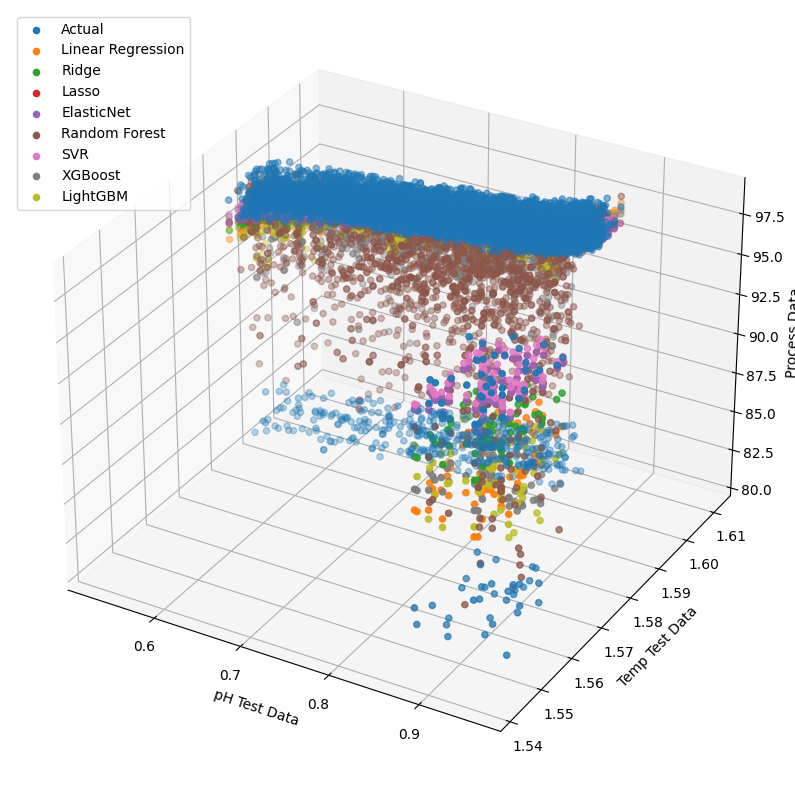

               Model      RMSE  Accuracy
0  Linear Regression  3.122398  0.390705
1              Ridge  3.138314  0.393633
2              Lasso  3.170203  0.395950
3         ElasticNet  3.170203  0.395950
4      Random Forest  3.616496  0.329227
5                SVR  3.213678  0.401439
6            XGBoost  3.180546  0.338741
7           LightGBM  3.131870  0.367407


In [85]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "ElasticNet": ElasticNet(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(kernel='linear'),
    "XGBoost": xgb.XGBRegressor(),
    "LightGBM": lgb.LGBMRegressor()
}

model_results = evaluate_models(models, train_data, test_data, ['pH', 'Temp'], 'Process')
print(model_results)

In [86]:
model_results 

,Model,RMSE,Accuracy
0,Linear Regression,3.122398,0.390705
1,Ridge,3.138314,0.393633
2,Lasso,3.170203,0.395950
3,ElasticNet,3.170203,0.395950
4,Random Forest,3.616496,0.329227
5,SVR,3.213678,0.401439
6,XGBoost,3.180546,0.338741
7,LightGBM,3.131870,0.367407


In [87]:
min_index = model_results['RMSE'].idxmin()
min_index

0

In [88]:
max_index = model_results['Accuracy'].idxmax()
max_index

5